/Users/malcolm/dev/bossjones/practical-python-and-opencv-case-studies/notebooks
/Users/malcolm/dev/bossjones/practical-python-and-opencv-case-studies/images/beach.png


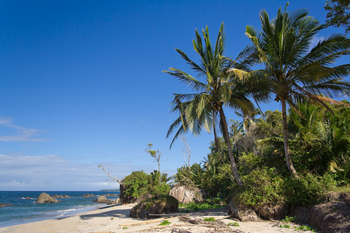

(233, 350, 3)

In [1]:
# USAGE
# python grayscale_histogram.py --image ../images/beach.png
import os
import argparse
import pathlib
from typing import Union, Any

import cv2
import imutils
# Import the necessary packages
import numpy as np
from PIL import Image
from IPython.display import display
# Import the necessary packages
from matplotlib import pyplot as plt

# Construct the argument parser and parse the arguments
# ap = argparse.ArgumentParser()
# ap.add_argument("-i", "--image", required=True, help="Path to the image")
# args = vars(ap.parse_args())

args = {}

current_folder = pathlib.Path(
    f"/Users/malcolm/dev/bossjones/practical-python-and-opencv-case-studies/notebooks")
print(current_folder)

# # Calculating path to the input data
args["image"] = pathlib.Path(
    f"{current_folder.parent}/images/beach.png").resolve()

print(args["image"])

assert args["image"].exists()

# _image = f"{args['image']}"
image: Union[np.ndarray, Any]
# # # Load the image and show it
image = cv2.imread(f"{args['image']}")


# In Pillow, the order of colors is assumed to be RGB (red, green, blue).
# As we are using Image.fromarray() of PIL module, we need to convert BGR to RGB.
temp_image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Converting BGR to RGB

# SOURCE: https://gist.github.com/mstfldmr/45d6e47bb661800b982c39d30215bc88
display(Image.fromarray(temp_image))

image.shape


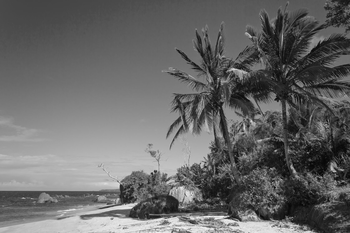

In [2]:
# Convert the image to grayscale
image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# In Pillow, the order of colors is assumed to be RGB (red, green, blue).
# As we are using Image.fromarray() of PIL module, we need to convert BGR to RGB.
# temp_image = cv2.cvtColor(gray, cv2.COLOR_BGR2GRAY)  # Converting BGR to RGB

# SOURCE: https://gist.github.com/mstfldmr/45d6e47bb661800b982c39d30215bc88
display(Image.fromarray(image))


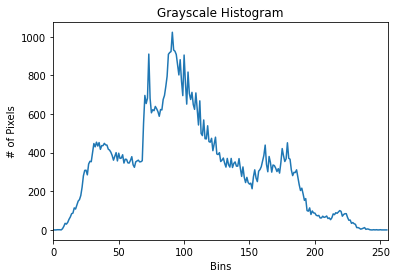

In [3]:
# Construct a grayscale histogram
# NOTE: cv2.calcHist(images,channels,mask,histSize,ranges)

# 1. images: This is the image that we want to compute a
# histogram for. Wrap it as a list: [myImage].
# 2. channels: This is a list of indexes, where we specify
# the index of the channel we want to compute a histogram
# for. To compute a histogram of a grayscale
# image, the list would be [0]. To compute a histogram
# for all three red, green, and blue channels, the channels
# list would be [0,1,2].
# 3. mask: Remember learning about masks in Chapter
# 6? Well, here we can supply a mask. If a mask is
# provided, a histogram will be computed for masked
# pixels only. If we do not have a mask or do not want
# to apply one, we can just provide a value of None.
# 4. histSize: This is the number of bins we want to use
# when computing a histogram. Again, this is a list, one
# for each channel we are computing a histogram for.
# The bin sizes do not all have to be the same. Here is
# an example of 32 bins for each channel: [32,32,32].
# 5. ranges: Here we specify The range of possible pixel
# values. Normally, this is [0, 256] for each channel, but
# if you are using a color space other than RGB (such as
# HSV), the ranges might be different.

hist = cv2.calcHist([image], [0], None, [256], [0, 256])

plt.figure()
plt.title("Grayscale Histogram")
plt.xlabel("Bins")
plt.ylabel("# of Pixels")
plt.plot(hist)
plt.xlim([0, 256])
plt.show()
